In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
# === Configuration ===
IMG_SIZE = (128, 128)
BATCH = 32
EPOCHS = 10
train_dir = r'Train_n_Test/TRAIN'  # Folder with subfolders of rice types


In [3]:
# === Data Generator ===
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [4]:
# === Load Training and Validation Data ===
train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='categorical',
    subset='validation'
)

Found 18000 images belonging to 20 classes.
Found 4500 images belonging to 20 classes.


In [5]:
# === Model Architecture ===
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SIZE + (3,)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')  # Output layer
])

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# === Compile Model ===
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# === Train Model ===
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 275s 484ms/step - accuracy: 0.3122 - loss: 2.1417 - val_accuracy: 0.5818 - val_loss: 1.1885
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 266s 473ms/step - accuracy: 0.6700 - loss: 0.9637 - val_accuracy: 0.6971 - val_loss: 0.8882
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 273s 485ms/step - accuracy: 0.7602 - loss: 0.7122 - val_accuracy: 0.6273 - val_loss: 1.1146
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 269s 477ms/step - accuracy: 0.8043 - loss: 0.5730 - val_accuracy: 0.7093 - val_loss: 0.8424
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 258s 458ms/step - accuracy: 0.8288 - loss: 0.4919 - val_accuracy: 0.7378 - val_loss: 0.7765
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 265s 470ms/step - accuracy: 0.8467 - loss: 0.4442 - val_accuracy: 0.7369 - val_loss: 0.8302
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 253s 449ms/step - accuracy: 0.8682 - loss: 0.3809 - val_accuracy: 0.7467 - val_loss: 0.7705
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 245s 435ms/step - accuracy: 0.8762 -

In [8]:
# === Save Model ===
model_path = 'rice_cnn_model.h5'
model.save(model_path)

print(f"✅ Model training complete. Saved as: {model_path}")

✅ Model training complete. Saved as: rice_cnn_model.h5


In [9]:
print(train_gen.class_indices)

{'10_Lal_Aush': 0, '11_Jirashail': 1, '12_Gutisharna': 2, '13_Red_Cargo': 3, '14_Najirshail': 4, '15_Katari_Polao': 5, '16_Lal_Biroi': 6, '17_Chinigura_Polao': 7, '18_Amon': 8, '19_Shorna5': 9, '1_Subol_Lota': 10, '20_Lal_Binni': 11, '2_Bashmoti': 12, '3_Ganjiya': 13, '4_Shampakatari': 14, '5_Katarivog': 15, '6_BR28': 16, '7_BR29': 17, '8_Paijam': 18, '9_Bashful': 19}


c:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


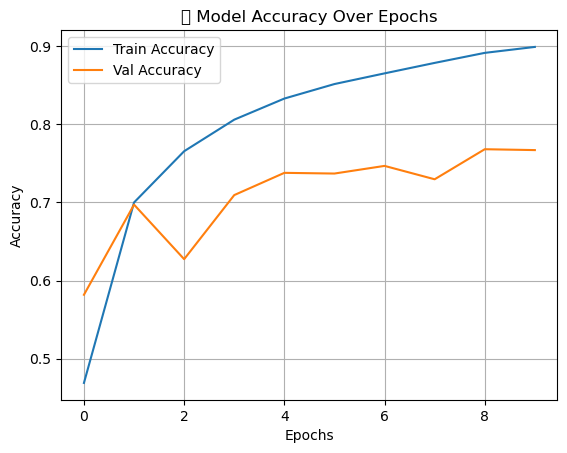

In [10]:
# Plot training vs validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('📈 Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
pip install tensorflow

In [13]:
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

# === Load the trained model ===
model = load_model("rice_cnn_model.h5")

# === Class labels ===
# NOTE: Update these labels based on your training folder names
class_names = ['Basmati', 'Jasmine', 'Arborio', 'BlackRice', 'BrownRice']  # example names

# === Set title ===
st.title("🍚 Rice Variety Classifier")
st.write("Upload a rice grain image and let the model predict the variety!")

# === Upload image ===
uploaded_file = st.file_uploader("Choose a rice image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Show image
    image = Image.open(uploaded_file).convert('RGB')
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Preprocess the image
    img = image.resize((128, 128))  # Must match training size
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Show result
    st.success(f"✅ Predicted Rice Type: **{predicted_class}**")
    st.info(f"🧠 Confidence: **{confidence:.2f}%**")


2025-07-10 15:04:56.660 
  command:

    streamlit run C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
